<a href="https://colab.research.google.com/github/jfcouchot/M1-ISL-IR-/blob/main/StratificationRandomState.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pour importer des données depuis Google Drive** 

On monte le dossier drive, puis on lit les fichiers csv 

In [39]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colabs/M2ISL_IR_CM2/"
train_all = pd.read_csv(path+'train.csv')
test_all = pd.read_csv(path+'test.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


affichage des données en mémoire

In [40]:
train_all 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Splitting Data**

Distributions potentiellement différentes entre le training et le testing

In [41]:
train_all.Survived.value_counts()/train_all.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

X = train_all.drop('Survived', axis = 1) 
y = train_all.Survived  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 163035)

In [43]:
y_train.value_counts() / y_train.shape[0] 

0    0.577247
1    0.422753
Name: Survived, dtype: float64

In [44]:
y_test.value_counts() / y_test.shape[0]

0    0.77095
1    0.22905
Name: Survived, dtype: float64

**Evaluation des différences entre distributions**

In [45]:
mn, idx, l= 0,-1,[]
for rs in range(int(1000)):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = rs)
  dif = abs((y_train.value_counts() / y_train.shape[0])[0] - (y_test.value_counts() / y_test.shape[0])[0])
  l.append(dif)
  if mn < dif :
    idx,mn = rs,dif
print(idx,mn)

273 0.13078275061201428


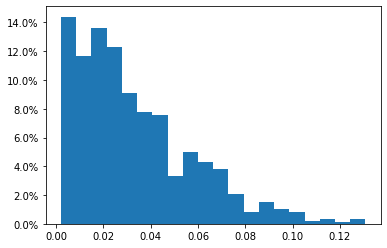

In [46]:
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np 

plt.hist(l, bins=20,weights=np.ones(len(l)) / len(l))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [47]:
# Split avec distribution équilibrées 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 20220115,stratify = y)


In [48]:
y_train.value_counts() / y_train.shape[0] 

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [49]:
y_test.value_counts() / y_test.shape[0]

0    0.614525
1    0.385475
Name: Survived, dtype: float64

**Mise en place apprentissage** 

Restriction aux attributs numériques et complets

In [50]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score  
X = X[['Pclass', 'Sex', 'SibSp', 'Fare']]  

In [51]:
X

,Pclass,Sex,SibSp,Fare
0,3,male,1,7.2500
1,1,female,1,71.2833
2,3,female,0,7.9250
3,1,female,1,53.1000
4,3,male,0,8.0500
...,...,...,...,...
886,2,male,0,13.0000
887,1,female,0,30.0000
888,3,female,1,23.4500
889,1,male,0,30.0000


Transforamtion female->1, male->0 

In [52]:
# The “Sex” variable is a string and needs to be one-hot encoded 
X['gender_dummy'] = pd.get_dummies(X.Sex)['female'] 
X = X.drop(['Sex'], axis = 1) 
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pclass,SibSp,Fare,gender_dummy
0,3,1,7.2500,0
1,1,1,71.2833,1
2,3,0,7.9250,1
3,1,1,53.1000,1
4,3,0,8.0500,0
...,...,...,...,...
886,2,0,13.0000,0
887,1,0,30.0000,1
888,3,1,23.4500,1
889,1,0,30.0000,0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20220115, stratify = y)

**Première évaluation de l'apprentissage**

avec random_state fixé

In [54]:
clf = RandomForestClassifier(n_estimators = 50, random_state = 0) 
clf = clf.fit(X_train, y_train)
preds = clf.predict(X_test) 
 

In [55]:
X_test

,Pclass,SibSp,Fare,gender_dummy
880,2,0,26.0000,1
815,1,0,0.0000,0
636,3,0,7.9250,0
523,1,0,57.9792,1
86,3,1,34.3750,0
...,...,...,...,...
676,3,0,8.0500,0
736,3,1,34.3750,1
53,2,1,26.0000,1
715,3,0,7.6500,0


In [56]:
predi = clf.predict([[2, 	0, 	25.0000, 	0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [57]:
y_test

880    1
815    0
636    0
523    1
86     0
      ..
676    0
736    0
53     1
715    0
670    1
Name: Survived, Length: 179, dtype: int64

In [58]:
preds

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1])

In [59]:
 
round(accuracy_score(y_true = y_test, y_pred = preds), 3)

0.793

In [60]:
mne = 0
idxe=-1
leclf=[]
for rs in range(int(1000)):
  clf = RandomForestClassifier(n_estimators = 50, random_state = rs) 
  clf = clf.fit(X_train, y_train)  
  preds = clf.predict(X_test)  
  sc = accuracy_score(y_true = y_test, y_pred = preds)
  leclf.append(sc)
  if sc > mne :
    idx = rs
    mne = sc

print(idx,mne)

80 0.8044692737430168


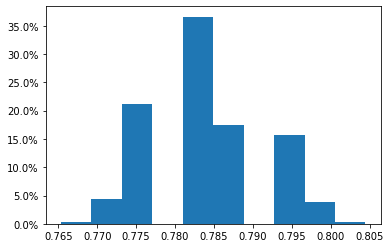

In [61]:
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np 

plt.hist(leclf,weights=np.ones(len(leclf)) / len(leclf))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [62]:
# moyenne et ecart type
res_series = pd.Series(leclf)
res_series.describe()

count    1000.000000
mean        0.783832
std         0.006919
min         0.765363
25%         0.776536
50%         0.782123
75%         0.787709
max         0.804469
dtype: float64

**Mise en place d'une démarche de PVP**

Utilisation de la version PVP de random forest de difprivlib avec import de bibliothèque

In [66]:
!pip install diffprivlib

In [70]:
import diffprivlib as dp

dpclf = dp.models.RandomForestClassifier(n_estimators = 50, random_state = 0,epsilon=0.1)
dpclf = dpclf.fit(X_train, y_train)  
preds = dpclf.predict(X_test)  
round(accuracy_score(y_true = y_test, y_pred = preds), 3)

/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:194: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)


0.603

In [71]:
def une_eval_avec_dp_random_forest(rs):
  dpclf = dp.models.RandomForestClassifier( n_estimators = 50, epsilon=0.1)
  dpclf = dpclf.fit(X_train, y_train)  
  preds = dpclf.predict(X_test)  
  return accuracy_score(y_true = y_test, y_pred = preds)

def evaluation(func,nbexp):
  s = pd.Series(np.arange(nbexp))
  sp = s.apply(func)
  return sp

sp = evaluation(une_eval_avec_dp_random_forest,100)
sp.describe()

/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:194: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:194: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:194: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

count    100.000000
mean       0.675196
std        0.046714
min        0.564246
25%        0.642458
50%        0.675978
75%        0.709497
max        0.776536
dtype: float64

In [72]:
sp.describe()

count    100.000000
mean       0.675196
std        0.046714
min        0.564246
25%        0.642458
50%        0.675978
75%        0.709497
max        0.776536
dtype: float64